In [3]:
import networkx as nx
import pandas as pd
import numpy as np


In [4]:
from google.cloud import bigquery
from google.oauth2 import service_account


credentials = service_account.Credentials.from_service_account_file('../references/Scam Transaction Detection-031b9e755035.json')
project_id = 'scam-transaction-detection'
client = bigquery.Client(credentials=credentials, project=project_id)
# bqstorageclient = bigquery_storage_v1beta1.BigQueryStorageClient(
#     credentials=credentials
# )

In [8]:
address = '0x005d069799675a6f9435f8a0dca98aaab88273bcfe'

query = F"""
SELECT
  txns.hash
  ,txns.nonce
  ,txns.transaction_index
  ,txns.from_address
  ,txns.to_address
  ,txns.value
  ,txns.gas
  ,txns.gas_price
  ,txns.receipt_cumulative_gas_used
  ,txns.receipt_gas_used
  ,txns.receipt_contract_address
  ,txns.receipt_status
  ,txns.block_timestamp
FROM
  `bigquery-public-data.crypto_ethereum.transactions` AS txns
WHERE TRUE
  AND txns.value > 0
  AND (txns.from_address = "{address}" OR txns.to_address = "{address}")
"""

In [9]:
query_job = client.query(query)

iterator = query_job.result(timeout=30)
# rows = list(iterator)

# # Transform the rows into a nice pandas dataframe
# df = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# # Look at the first 10
# df.head(10)

In [49]:
df.dtypes

hash                                        object
nonce                                        int64
transaction_index                            int64
from_address                                object
to_address                                  object
value                                       object
gas                                          int64
gas_price                                    int64
receipt_cumulative_gas_used                  int64
receipt_gas_used                             int64
receipt_contract_address                    object
receipt_status                              object
block_timestamp                datetime64[ns, UTC]
dtype: object

In [47]:
df.shape

(427, 13)

In [11]:
scam_address = '0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1'


query = F"""
SELECT
  txns.hash
  ,txns.nonce
  ,txns.transaction_index
  ,txns.from_address
  ,txns.to_address
  ,txns.value
  ,txns.gas
  ,txns.gas_price
  ,txns.receipt_cumulative_gas_used
  ,txns.receipt_gas_used
  ,txns.receipt_contract_address
  ,txns.receipt_status
  ,txns.block_timestamp
FROM
  `bigquery-public-data.crypto_ethereum.transactions` AS txns
WHERE TRUE
  AND txns.value > 0
  AND (txns.from_address = "{scam_address}" OR txns.to_address = "{scam_address}")
"""

In [12]:
query_job = client.query(query)

iterator = query_job.result(timeout=30)
rows = list(iterator)
# # Transform the rows into a nice pandas dataframe
# df = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# # Look at the first 10
# df.head(10)

In [13]:
rows

[Row(('0x5259c01043c7dcd6e49d2757e2b77dc085943d3b56239bdf0a1e4e02bf56f48e', 50, 120, '0xf49874712828e3d73a12c15f9f77c5529eb0632f', '0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1', Decimal('3597979609501920'), 21000, 2000000000, 9904199, 21000, None, 1, datetime.datetime(2020, 1, 31, 18, 30, 3, tzinfo=<UTC>)), {'hash': 0, 'nonce': 1, 'transaction_index': 2, 'from_address': 3, 'to_address': 4, 'value': 5, 'gas': 6, 'gas_price': 7, 'receipt_cumulative_gas_used': 8, 'receipt_gas_used': 9, 'receipt_contract_address': 10, 'receipt_status': 11, 'block_timestamp': 12}),
 Row(('0x86854d6692913a3fc9403790e8b8d12b6df8f39bdee0d983a48844d7079d1305', 51, 109, '0xf49874712828e3d73a12c15f9f77c5529eb0632f', '0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1', Decimal('2279000000000000000'), 21000, 5000000000, 6052318, 21000, None, 1, datetime.datetime(2020, 1, 31, 20, 25, 49, tzinfo=<UTC>)), {'hash': 0, 'nonce': 1, 'transaction_index': 2, 'from_address': 3, 'to_address': 4, 'value': 5, 'gas': 6, 'gas_price': 7, 

In [14]:
pd.to_datetime("2019-11-29 16:25:57")

Timestamp('2019-11-29 16:25:57')

In [80]:
# Transform the rows into a nice pandas dataframe
df = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# Look at the first 10
df.head(10)

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_status,block_timestamp
0,0xe896da710af674b203ec360b2d73434d6d10da2b422e...,53,182,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,798000000000000,21000,8000000000,7415811,21000,None,1,2019-11-29 16:25:57+00:00
1,0x28fb91f62b1948d044db2db46411ea0042473d158353...,29,36,0xf49874712828e3d73a12c15f9f77c5529eb0632f,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,48000000000000000,21000,6000000000,2823118,21000,None,1,2019-12-30 12:58:56+00:00
2,0x29931318eac76fb7ec086cbfaee3d95994c554a466f4...,28,101,0xf49874712828e3d73a12c15f9f77c5529eb0632f,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,1093000000000000000,21000,5000000000,5082356,21000,None,1,2019-12-30 05:40:39+00:00
3,0xb74c8334a51097a94b1796ae16a85e009c355b58ceec...,71,61,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,47895000000000000,21000,5000000000,5514071,21000,None,1,2019-12-30 13:03:40+00:00
4,0x71741c64fff59755c32e14e0fa53bc4a4ad51ff3545a...,70,201,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,1092968500000000000,21000,1500000000,9673734,21000,None,1,2019-12-30 05:46:10+00:00
5,0x85277f87e7a4770cda807ebbfe9188d566f1b531e0cc...,20,114,0xdc5b9590d1516155f9805e45deb1758a31b9e783,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,900000000000000,21000,4500000000,4541972,21000,None,1,2019-05-04 01:42:16+00:00
6,0x5259c01043c7dcd6e49d2757e2b77dc085943d3b5623...,50,120,0xf49874712828e3d73a12c15f9f77c5529eb0632f,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,3597979609501920,21000,2000000000,9904199,21000,None,1,2020-01-31 18:30:03+00:00
7,0x86854d6692913a3fc9403790e8b8d12b6df8f39bdee0...,51,109,0xf49874712828e3d73a12c15f9f77c5529eb0632f,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,2279000000000000000,21000,5000000000,6052318,21000,None,1,2020-01-31 20:25:49+00:00
8,0x8c1867694c4899e515dfe623c298641c24c620708045...,92,122,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,3555979609501920,21000,2000000000,6716565,21000,None,1,2020-01-31 18:33:51+00:00
9,0x2c6b156e94b85c971eba964adccac71411848d2916e5...,93,45,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,2278958000000000000,21000,2000000000,2131918,21000,None,1,2020-01-31 20:28:13+00:00


In [81]:
df.shape

(273, 13)

In [20]:
from datetime import timedelta
date = pd.to_datetime("2019-11-29 16:25:57")
date

Timestamp('2019-11-29 16:25:57')

In [46]:
scam_address = '0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1'
date = "2019-11-29 16:25:57"
date = pd.to_datetime(date)
date_min = date - timedelta(minutes=5)
date_max = date + timedelta(minutes=5)


query = F"""
SELECT *
FROM
  `bigquery-public-data.crypto_ethereum.transactions` AS txns
WHERE TRUE
  AND txns.value > 0
  AND txns.block_timestamp >= "{date_min}"
  AND txns.block_timestamp <= "{date_max}"
  ORDER BY txns.block_timestamp
"""

In [48]:
query_job = client.query(query)

iterator = query_job.result(timeout=30)
rows = list(iterator)

In [49]:
# Transform the rows into a nice pandas dataframe
df = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# Look at the first 10
df.head(10)

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash
0,0xcd47723c71c1ccf7873c9ceb70f0ed42578d07b077c7...,0,9,0xc1049efca6a7ff37c41a12d238dc03b2e8529faf,0xb0fc4dcefcd0f994ff4dfad9e504011ba88675a0,17088280000000000,21000,10000000000,0x,4275151,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
1,0xaed61abb51e674c81bed7d7945c72e838f535ab0d38c...,5914,63,0xb938c0469209f76eea200907e0b62cc8a46e137d,0xdca8ce0f53c12b3f517d5ed0b31e814fa7303414,650000000000000,21000,10000000000,0x,6631945,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
2,0xf3f7790175a0273a0e7ada985d801922d8141c7b1c00...,1946,103,0x75e6de78c9968c6b5faba747d73de70787591aac,0x50e65e5c11b454ea32840fc67a8ad6ab68629bef,449000000000000000,21000,10000000000,0x,9943762,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
3,0x503c53f37e1ec2ab4b4ee38a0376a716ad2735109256...,42,81,0xa0094a753a7ac0d67925bc85d43b0a265ebf75ff,0x1cbe66f567927d93f3168d166bc47c830f6a11f9,6929780000000000,21000,10000000000,0x,7812203,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
4,0x48e4311543b1934a852ae6740aab19dc712f09411130...,5912,61,0xb938c0469209f76eea200907e0b62cc8a46e137d,0xab1e5b1a98f80e8c52cb2240c9522f8284489f71,650000000000000,21000,10000000000,0x,6589945,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
5,0x291d200ef10e231436c7bf2ad878970828fe7ee60a19...,0,10,0xcf5974b990a95002feabe973ed75be677172f673,0xd40b4df94f9361ff10176e7216aeb1807418b19e,259635000000000000,21000,10000000000,0x,4296151,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
6,0x0475f615f57e5e61db29abced7aa8ab316bb6bac2078...,5913,62,0xb938c0469209f76eea200907e0b62cc8a46e137d,0x45c815157939ef6b43c7d34870d5fbe5cd91a7a4,650000000000000,21000,10000000000,0x,6610945,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
7,0x07e6ea41068883798bfe667318d078d36cf441dfd2cb...,1812,67,0x60771c80604e6f1f087ca6b828270a2c1bded3a8,0x300a5a9948ffb2decdefc48deadde34db88c76c0,103500000000000000,21000,10000000000,0x,6719877,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
8,0x8f2c327b0b57053c8f907e08eae4e629f9adf7e333db...,8,84,0xb5ce20ce7436bdce09cb3885c01d9ed57fcaba70,0x28c5f6d5ff62b4e2042a7780987cdebbc8fde601,40000000000000000,21000,10000000000,0x,7937075,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
9,0xaeb091d01b128c1eb5e69eb938d42f46dd18b528cbda...,53,104,0xc17893de677bdd7aa8396533d7c8c5a6d9f38ded,0xecb4d2d53818864417cc486101e6c40998344c91,25000000000000000000,21000,10000000000,0x,9964762,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...


In [52]:
df.shape

(2209, 17)

In [53]:
G = nx.from_pandas_edgelist(df, source='from_address', target='to_address', edge_attr=['value', 'nonce', 'block_timestamp'], create_using=nx.MultiDiGraph)



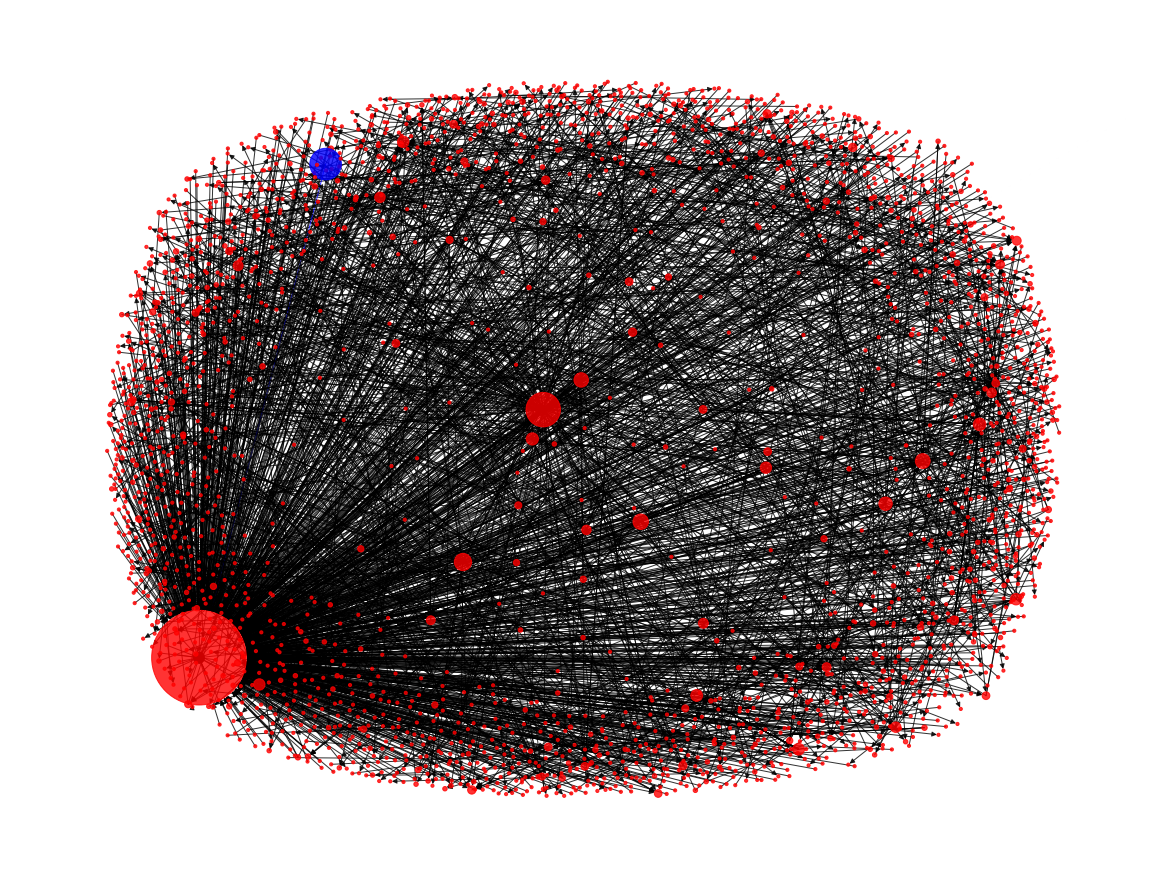

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12)) 
d = dict(G.degree)
d["0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1"] = 100
color_map = []
edge_color_map = []
for u, v in G.edges():
    if u == "0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1" or v == "0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1":
        edge_color_map.append("blue")
    else:
        edge_color_map.append("black")
for node in G:
    if node == "0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1":
        color_map.append('blue')
    else: 
        color_map.append('red')
edge_size = [5 for _ in range(len(G))]
edge_size = []
for _ in range(len(G)):
    if u == "0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1" or v == "0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1":
        edge_size.append(20)
    else:
        edge_size.append(5)
pos = nx.spring_layout(G, k=0.3, iterations=20)
nx.draw(G, pos=pos, node_color=color_map, edge_color=edge_color_map, 
        node_size=[v * 10 for v in d.values()], alpha=0.8, edge_size=edge_size)
plt.show()

C:\Users\djaniak\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\djaniak\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:569: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\djaniak\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


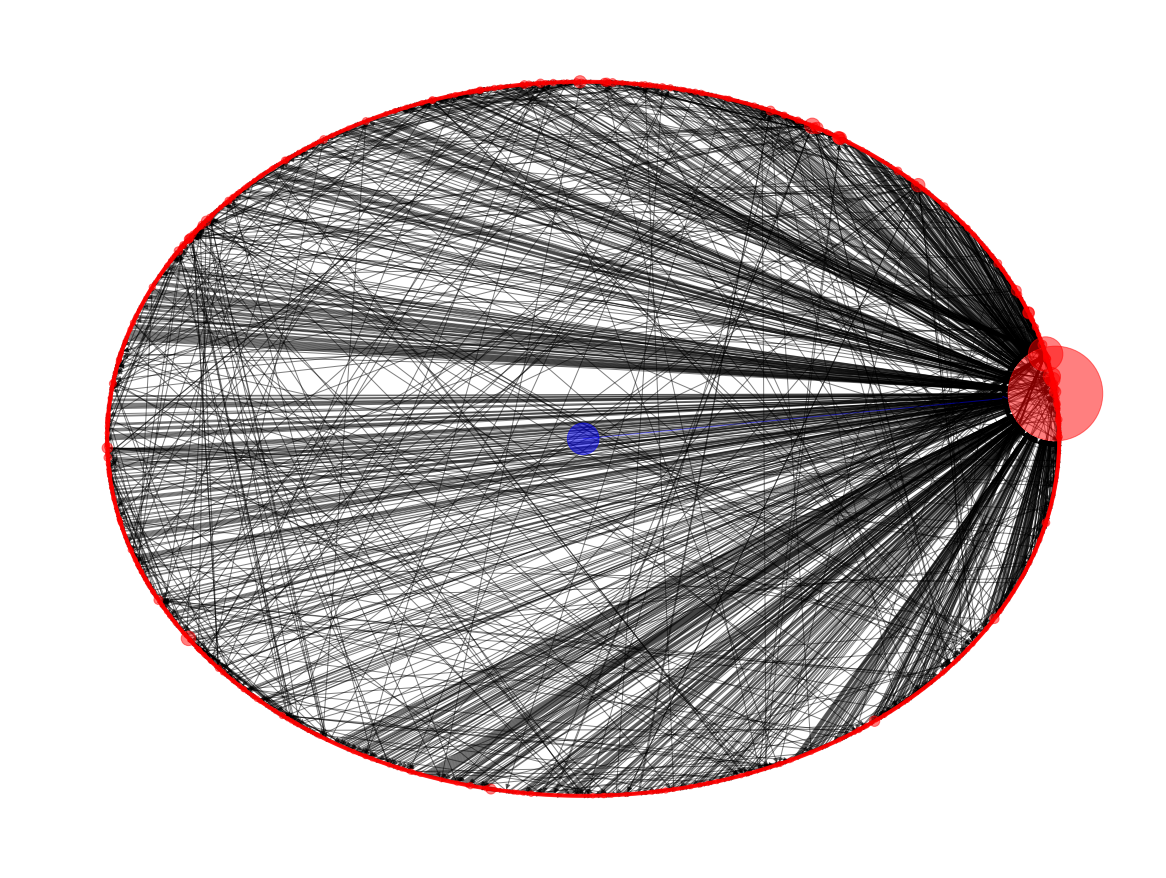

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12)) 
d = dict(G.degree)
d["0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1"] = 100
color_map = []
edge_color_map = []
for u, v in G.edges():
    if u == "0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1" or v == "0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1":
        edge_color_map.append("blue")
    else:
        edge_color_map.append("black")
for node in G:
    if node == "0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1":
        color_map.append('blue')
    else: 
        color_map.append('red')
pos = nx.circular_layout(G, scale=2)
pos
pos["0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1"] = np.array([0, 0])
nx.draw(G, pos=pos, node_color=color_map, edge_color=edge_color_map, 
        node_size=[v * 10 for v in d.values()], arrows=True, alpha=0.5)
plt.show()

In [64]:
for e in G.edges():
    print(e)
    break

('0xc1049efca6a7ff37c41a12d238dc03b2e8529faf', '0xb0fc4dcefcd0f994ff4dfad9e504011ba88675a0')
